In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataaset
df = pd.read_csv("insuranceFraud.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
# Dataset Top rows

df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1406.91,MD,MALE,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22,MD,MALE,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?,Y
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,1413.14,PhD,FEMALE,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1415.74,PhD,FEMALE,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO,Y
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1583.91,Associate,MALE,sales,unmarried,Vehicle Theft,?,Minor Damage,None,NO,NO,N


In [5]:
# Dataset Last Rows
df.tail()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
995,3,1000,0,0,0,20,1,0,1,17440,8720,61040,1310.80,Masters,FEMALE,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,?,N
996,285,1000,0,70900,0,23,1,2,3,18080,18080,72320,1436.79,PhD,FEMALE,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,?,N
997,130,500,3000000,35100,0,4,3,2,3,7500,7500,52500,1383.49,Masters,FEMALE,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,?,YES,N
998,458,2000,5000000,0,0,2,1,0,1,5220,5220,36540,1356.92,Associate,MALE,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,?,YES,N
999,456,1000,0,0,0,6,1,0,3,460,920,3680,766.19,Associate,FEMALE,sales,husband,Parked Car,?,Minor Damage,Police,?,?,N


In [6]:
print(" Dataset have \n Rows= ",df.shape[0],'\n Columns= ',df.shape[1])

 Dataset have 
 Rows=  1000 
 Columns=  24


In [7]:
# Dataset Datatypes
df.dtypes

months_as_customer               int64
policy_deductable                int64
umbrella_limit                   int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
policy_annual_premium          float64
insured_education_level         object
insured_sex                     object
insured_occupation              object
insured_relationship            object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
property_damage                 object
police_report_available         object
fraud_reported                  object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00
witnesses,1000.0,1.487000e+00,1.111335e+00,0.00,1.0000,1.0,2.000,3.00
injury_claim,1000.0,7.433420e+03,4.880952e+03,0.00,4295.0000,6775.0,11305.000,21450.00


# Missing Values

In [9]:
df.isnull().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
policy_annual_premium          0
insured_education_level        0
insured_sex                    0
insured_occupation             0
insured_relationship           0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
property_damage                0
police_report_available        0
fraud_reported                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_deductable            1000 non-null   int64  
 2   umbrella_limit               1000 non-null   int64  
 3   capital-gains                1000 non-null   int64  
 4   capital-loss                 1000 non-null   int64  
 5   incident_hour_of_the_day     1000 non-null   int64  
 6   number_of_vehicles_involved  1000 non-null   int64  
 7   bodily_injuries              1000 non-null   int64  
 8   witnesses                    1000 non-null   int64  
 9   injury_claim                 1000 non-null   int64  
 10  property_claim               1000 non-null   int64  
 11  vehicle_claim                1000 non-null   int64  
 12  policy_annual_premium        1000 non-null   float64
 13  insured_education_l

<AxesSubplot:>

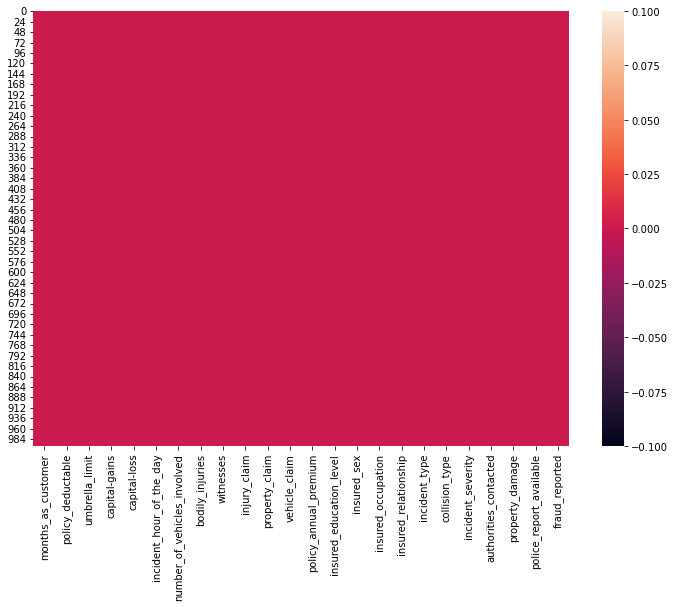

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [12]:
df.dtypes

months_as_customer               int64
policy_deductable                int64
umbrella_limit                   int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
policy_annual_premium          float64
insured_education_level         object
insured_sex                     object
insured_occupation              object
insured_relationship            object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
property_damage                 object
police_report_available         object
fraud_reported                  object
dtype: object

# Exploratory Data Analysis: Univarient

In [13]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [14]:
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 11
Number of Continuous features: 13


([<matplotlib.patches.Wedge at 0x129223d31c0>,
 [Text(0.14357877740594222, 1.0905893519921306, 'Categorical'),
  Text(-0.1435786752975972, -1.090589365434941, 'Continuous')],
 [Text(0.07831569676687757, 0.5948669192684347, '45.8%'),
  Text(-0.07831564107141666, -0.5948669266008769, '54.2%')])

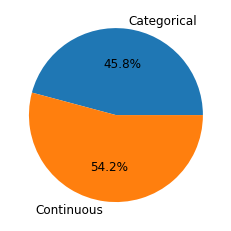

In [15]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')

In [16]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'insured_education_level', 'insured_sex',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

# Target Variable -  Fraud Detected

In [17]:
df['fraud_reported'].value_counts(dropna=False)

N    753
Y    247
Name: fraud_reported, dtype: int64

In [18]:
target_df=df['fraud_reported'].value_counts()*100/df.shape[0]
target_df

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [19]:
df['fraud_reported'].value_counts(normalize=True)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

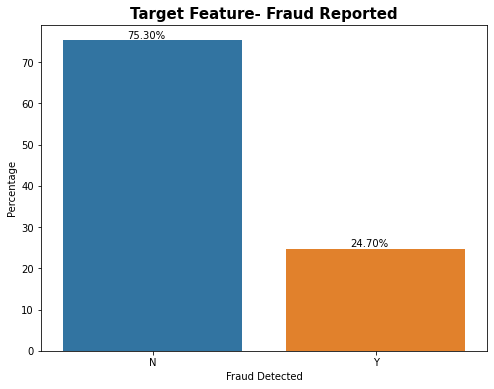

In [20]:
plt.figure(figsize=(8,6))
plt.title("Target Feature- Fraud Reported",fontdict={'fontweight':'bold','fontsize':15})
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x+width/2.8,height+0.5,f'{height:.2f}%')

# incident_state  vs Tar4get variable

In [21]:
# All cases reported on the month of January and Feb of 2015, few in March only

# incident_type vs fraud

In [22]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

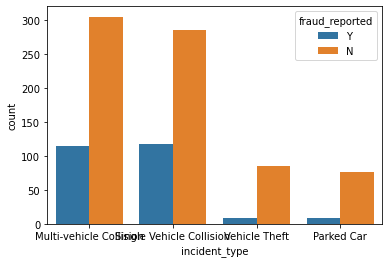

In [23]:
sns.countplot(df['incident_type'], order=df['incident_type'].value_counts().index,hue=df['fraud_reported'])

In [24]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

Text(0, 0.5, 'Percentage ')

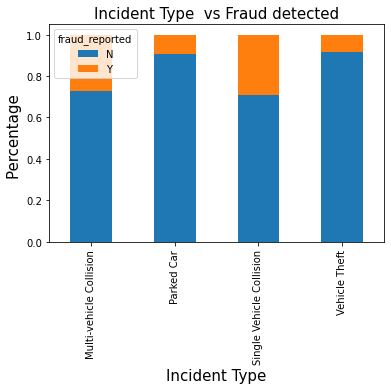

In [25]:
table=pd.crosstab(df['incident_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Incident Type  vs Fraud detected",fontsize=15)
plt.xlabel('Incident Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

In [26]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'insured_education_level', 'insured_sex',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [27]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [28]:
df['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [29]:
df['collision_type'].replace('?',np.nan,inplace=True)

In [30]:
df['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

Text(0, 0.5, 'Percentage ')

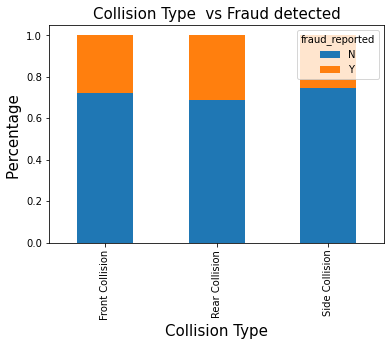

In [31]:
table=pd.crosstab(df['collision_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Collision Type  vs Fraud detected",fontsize=15)
plt.xlabel('Collision Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

In [32]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'insured_education_level', 'insured_sex',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [33]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [34]:
df['incident_severity'].value_counts(normalize=True)

Minor Damage      0.354
Total Loss        0.280
Major Damage      0.276
Trivial Damage    0.090
Name: incident_severity, dtype: float64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

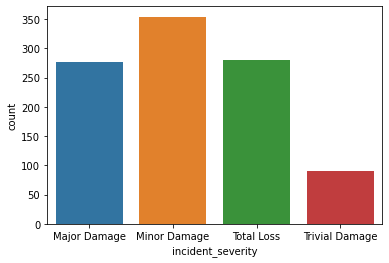

In [35]:
sns.countplot(df['incident_severity'])

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

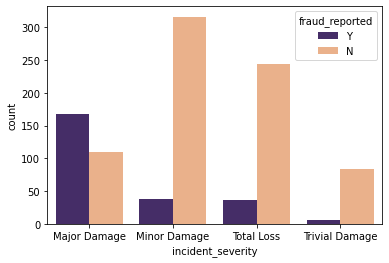

In [36]:
sns.countplot(df['incident_severity'],hue=df['fraud_reported'],palette=['#432371',"#FAAE7B"])

# authorities_contacted  vs fraud_reported

In [37]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

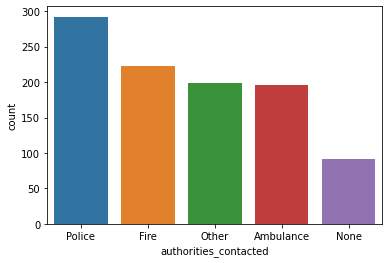

In [38]:
sns.countplot(df['authorities_contacted'], order=df['authorities_contacted'].value_counts().index)

In [39]:
df['authorities_contacted'].value_counts(normalize=True)*100

Police       29.2
Fire         22.3
Other        19.8
Ambulance    19.6
None          9.1
Name: authorities_contacted, dtype: float64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

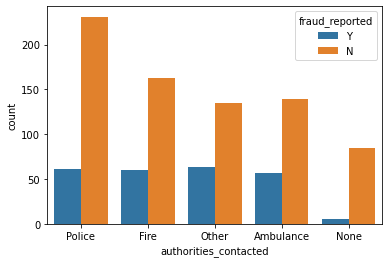

In [40]:
sns.countplot(df['authorities_contacted'], order=df['authorities_contacted'].value_counts().index, hue=df['fraud_reported'])

# number_of_vehicles_involved 

In [41]:
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

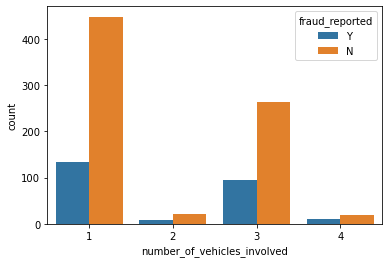

In [42]:
sns.countplot(df['number_of_vehicles_involved'], hue=df['fraud_reported'])

# property_damage

In [43]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [44]:
df['property_damage'].replace('?',np.nan, inplace=True)

In [45]:
df['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

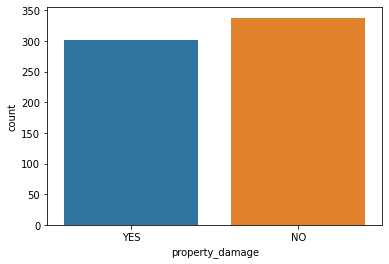

In [46]:
sns.countplot(df['property_damage'])

<AxesSubplot:xlabel='property_damage', ylabel='count'>

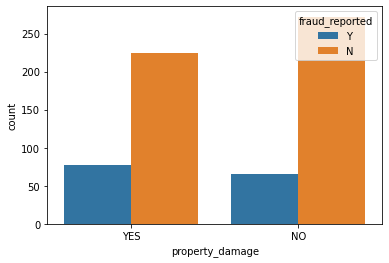

In [47]:
sns.countplot(df['property_damage'],hue=df['fraud_reported'])

In [48]:
df.groupby('property_damage')['fraud_reported'].value_counts()

property_damage  fraud_reported
NO               N                 272
                 Y                  66
YES              N                 224
                 Y                  78
Name: fraud_reported, dtype: int64

In [49]:
df.replace('?',np.nan,inplace=True)

# bodily_injuries

In [50]:
df['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

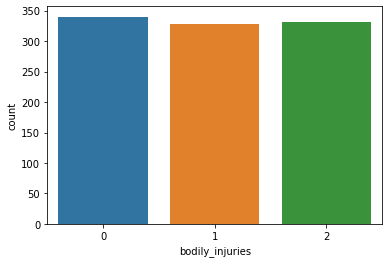

In [51]:
sns.countplot(df['bodily_injuries'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

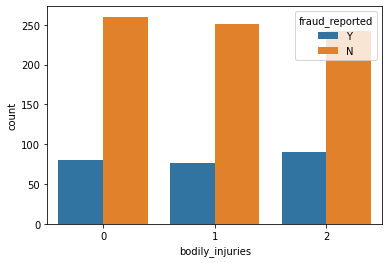

In [52]:
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])

In [53]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'insured_education_level', 'insured_sex',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [54]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

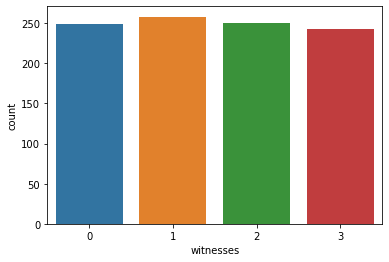

In [55]:
sns.countplot(df['witnesses'])

<AxesSubplot:xlabel='witnesses', ylabel='count'>

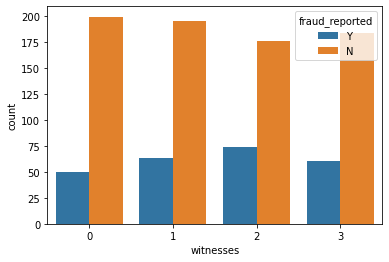

In [56]:
sns.countplot(df['witnesses'],hue=df['fraud_reported'])

In [57]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'insured_education_level', 'insured_sex',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

# police_report_available

In [58]:
df['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

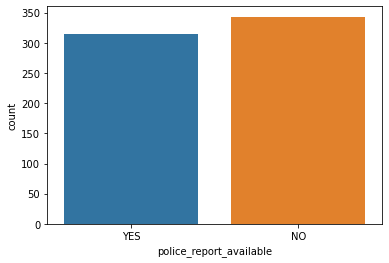

In [59]:
sns.countplot(df['police_report_available'])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

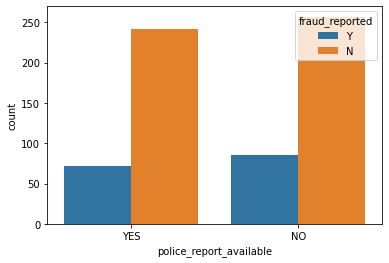

In [60]:
sns.countplot(df['police_report_available'],hue=df['fraud_reported'])

# Vehicle Detail

# Insured Person Exploratory Analysis

In [61]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'insured_education_level', 'insured_sex',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [62]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

([<matplotlib.patches.Wedge at 0x12923ef33a0>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'FEMALE'),
  Text(0.12757508092656858, -1.0925770447554624, 'MALE')],
 [Text(-0.06958640777812825, 0.5959511153211613, '53.70%'),
  Text(0.0695864077781283, -0.5959511153211613, '46.30%')])

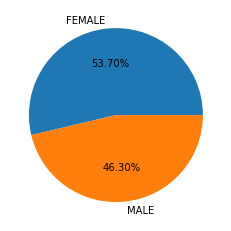

In [63]:
plt.pie(df['insured_sex'].value_counts().values,labels=df['insured_sex'].value_counts().index,autopct='%1.2f%%')

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

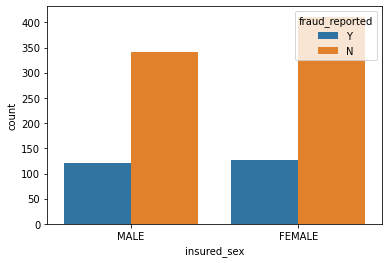

In [64]:
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])

# insured_education_level

In [65]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

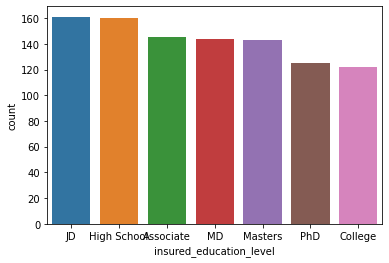

In [66]:
sns.countplot(df['insured_education_level'],order=df['insured_education_level'].value_counts().index)

<AxesSubplot:xlabel='insured_education_level'>

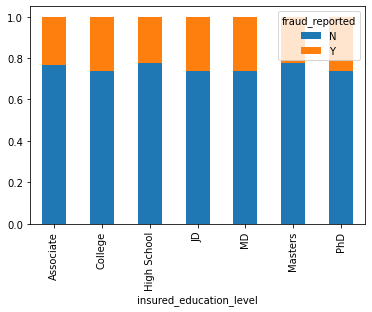

In [67]:
table=pd.crosstab(df['insured_education_level'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

In [68]:
# cases are from each education level

In [69]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

<AxesSubplot:xlabel='insured_occupation'>

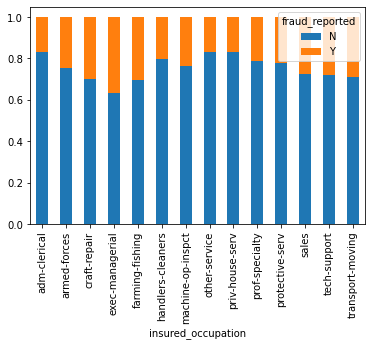

In [70]:
table=pd.crosstab(df['insured_occupation'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

## insured_relationship

In [71]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

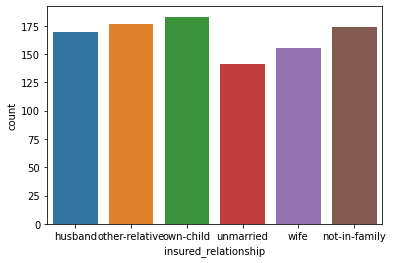

In [72]:
sns.countplot(df['insured_relationship'])

In [73]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'insured_education_level', 'insured_sex',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

## capital-gains

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

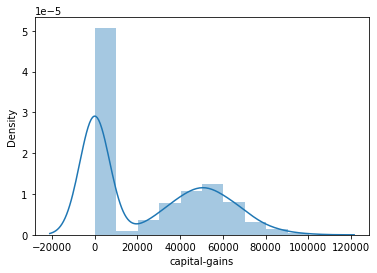

In [74]:
sns.distplot(df['capital-gains'])

In [75]:
df[cont_features]

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1406.91
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,1413.14
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1415.74
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1583.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,0,20,1,0,1,17440,8720,61040,1310.80
996,285,1000,0,70900,0,23,1,2,3,18080,18080,72320,1436.79
997,130,500,3000000,35100,0,4,3,2,3,7500,7500,52500,1383.49
998,458,2000,5000000,0,0,2,1,0,1,5220,5220,36540,1356.92


<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

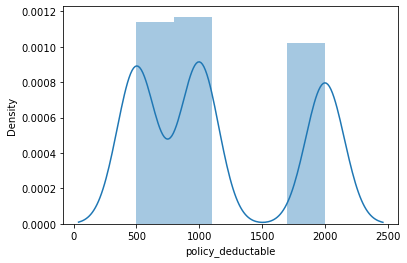

In [76]:
sns.distplot(df['policy_deductable'])

In [77]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

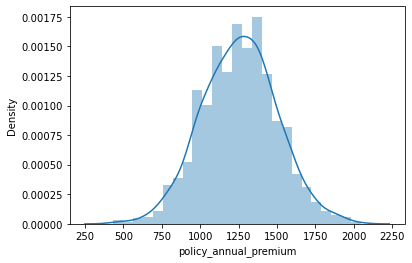

In [78]:
sns.distplot(df['policy_annual_premium'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '-1000000'),
  Text(1, 0, '0'),
  Text(2, 0, '2000000'),
  Text(3, 0, '3000000'),
  Text(4, 0, '4000000'),
  Text(5, 0, '5000000'),
  Text(6, 0, '6000000'),
  Text(7, 0, '7000000'),
  Text(8, 0, '8000000'),
  Text(9, 0, '9000000'),
  Text(10, 0, '10000000')])

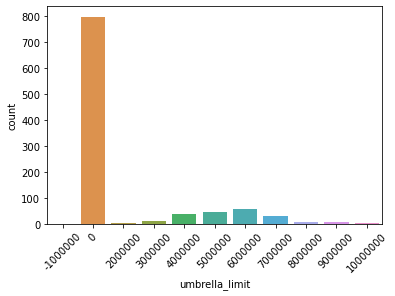

In [79]:
sns.countplot(df['umbrella_limit'])
plt.xticks(rotation=45)

In [80]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [81]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

## capital-gains

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

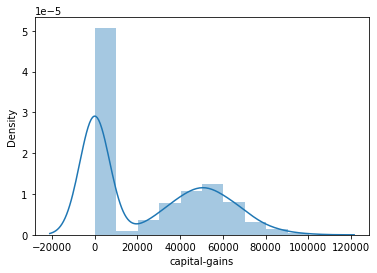

In [82]:
sns.distplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

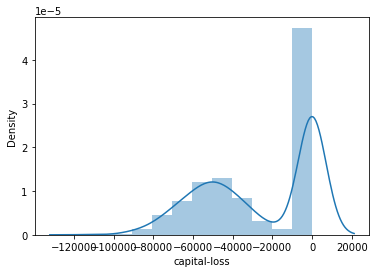

In [83]:
sns.distplot(df['capital-loss'])

In [84]:
df[cont_features]

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1406.91
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,1413.14
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1415.74
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1583.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,0,20,1,0,1,17440,8720,61040,1310.80
996,285,1000,0,70900,0,23,1,2,3,18080,18080,72320,1436.79
997,130,500,3000000,35100,0,4,3,2,3,7500,7500,52500,1383.49
998,458,2000,5000000,0,0,2,1,0,1,5220,5220,36540,1356.92


Text(0.5, 0, 'policy_deductable')

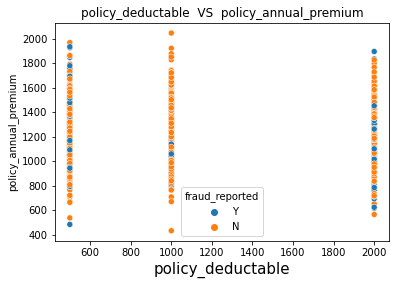

In [85]:
sns.scatterplot('policy_deductable','policy_annual_premium',hue='fraud_reported',data=df)
plt.title('policy_deductable  VS  policy_annual_premium')
plt.xlabel('policy_deductable',fontsize=15)

Text(0.5, 0, 'capital-loss')

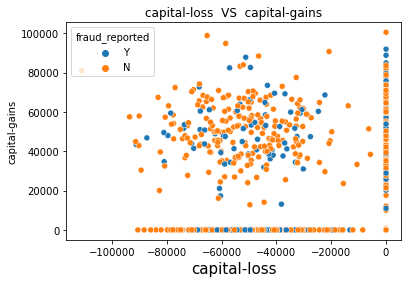

In [86]:
sns.scatterplot('capital-loss','capital-gains',hue='fraud_reported',data=df)
plt.title('capital-loss  VS  capital-gains')
plt.xlabel('capital-loss',fontsize=15)

In [87]:
df['capital-gains'].mean() , df['capital-loss'].mean()

(25126.1, -26793.7)

# Distribution of Categorical features

In [88]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

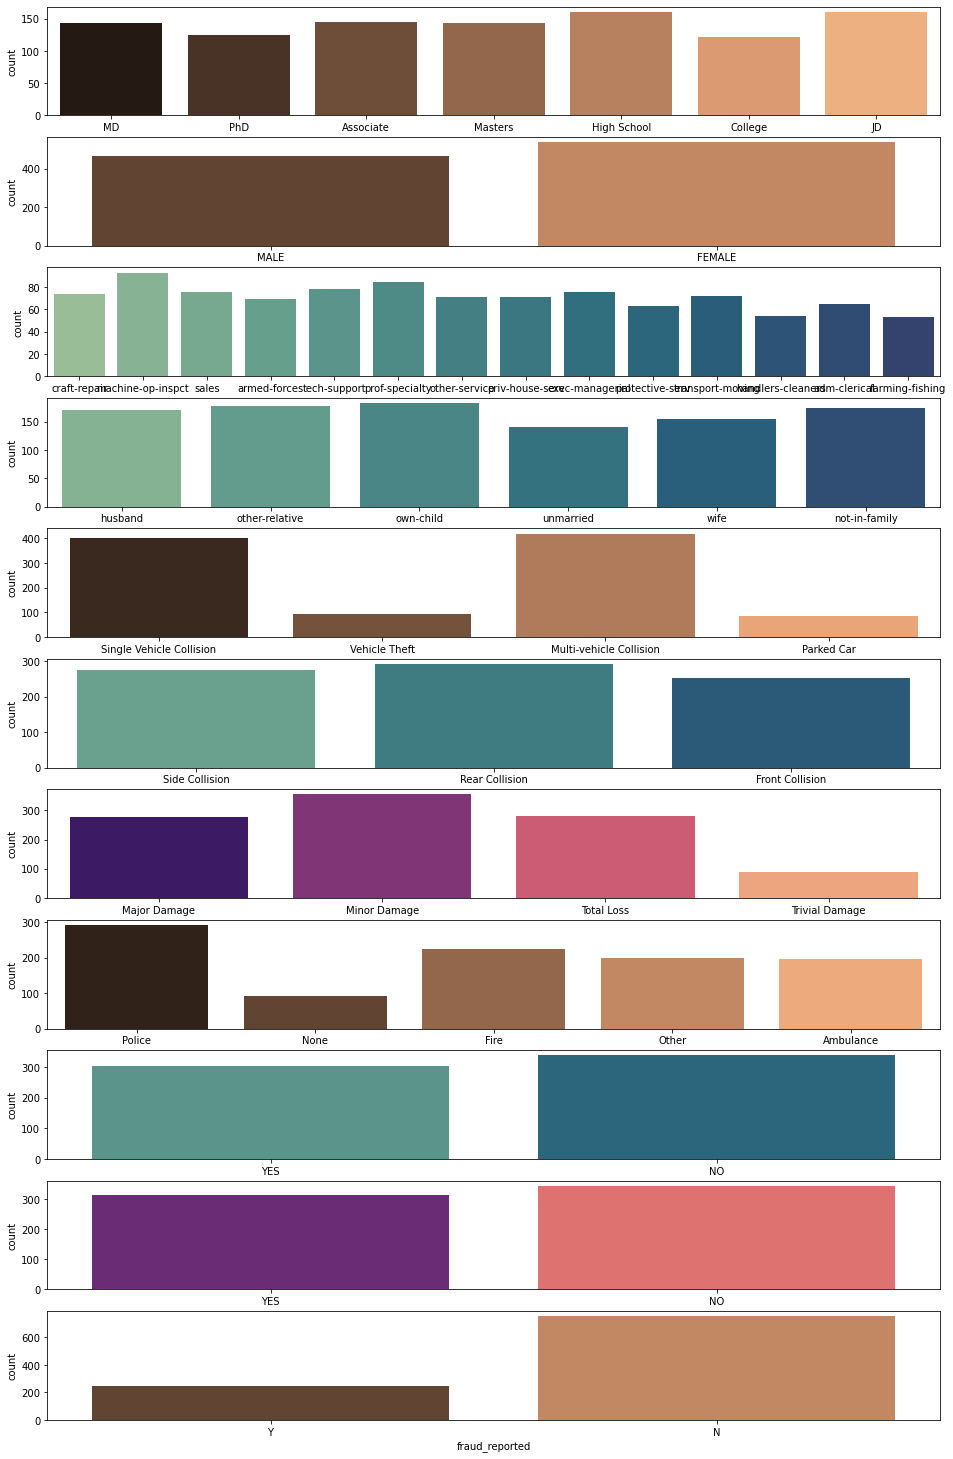

In [89]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

# Distribution of Numerical features

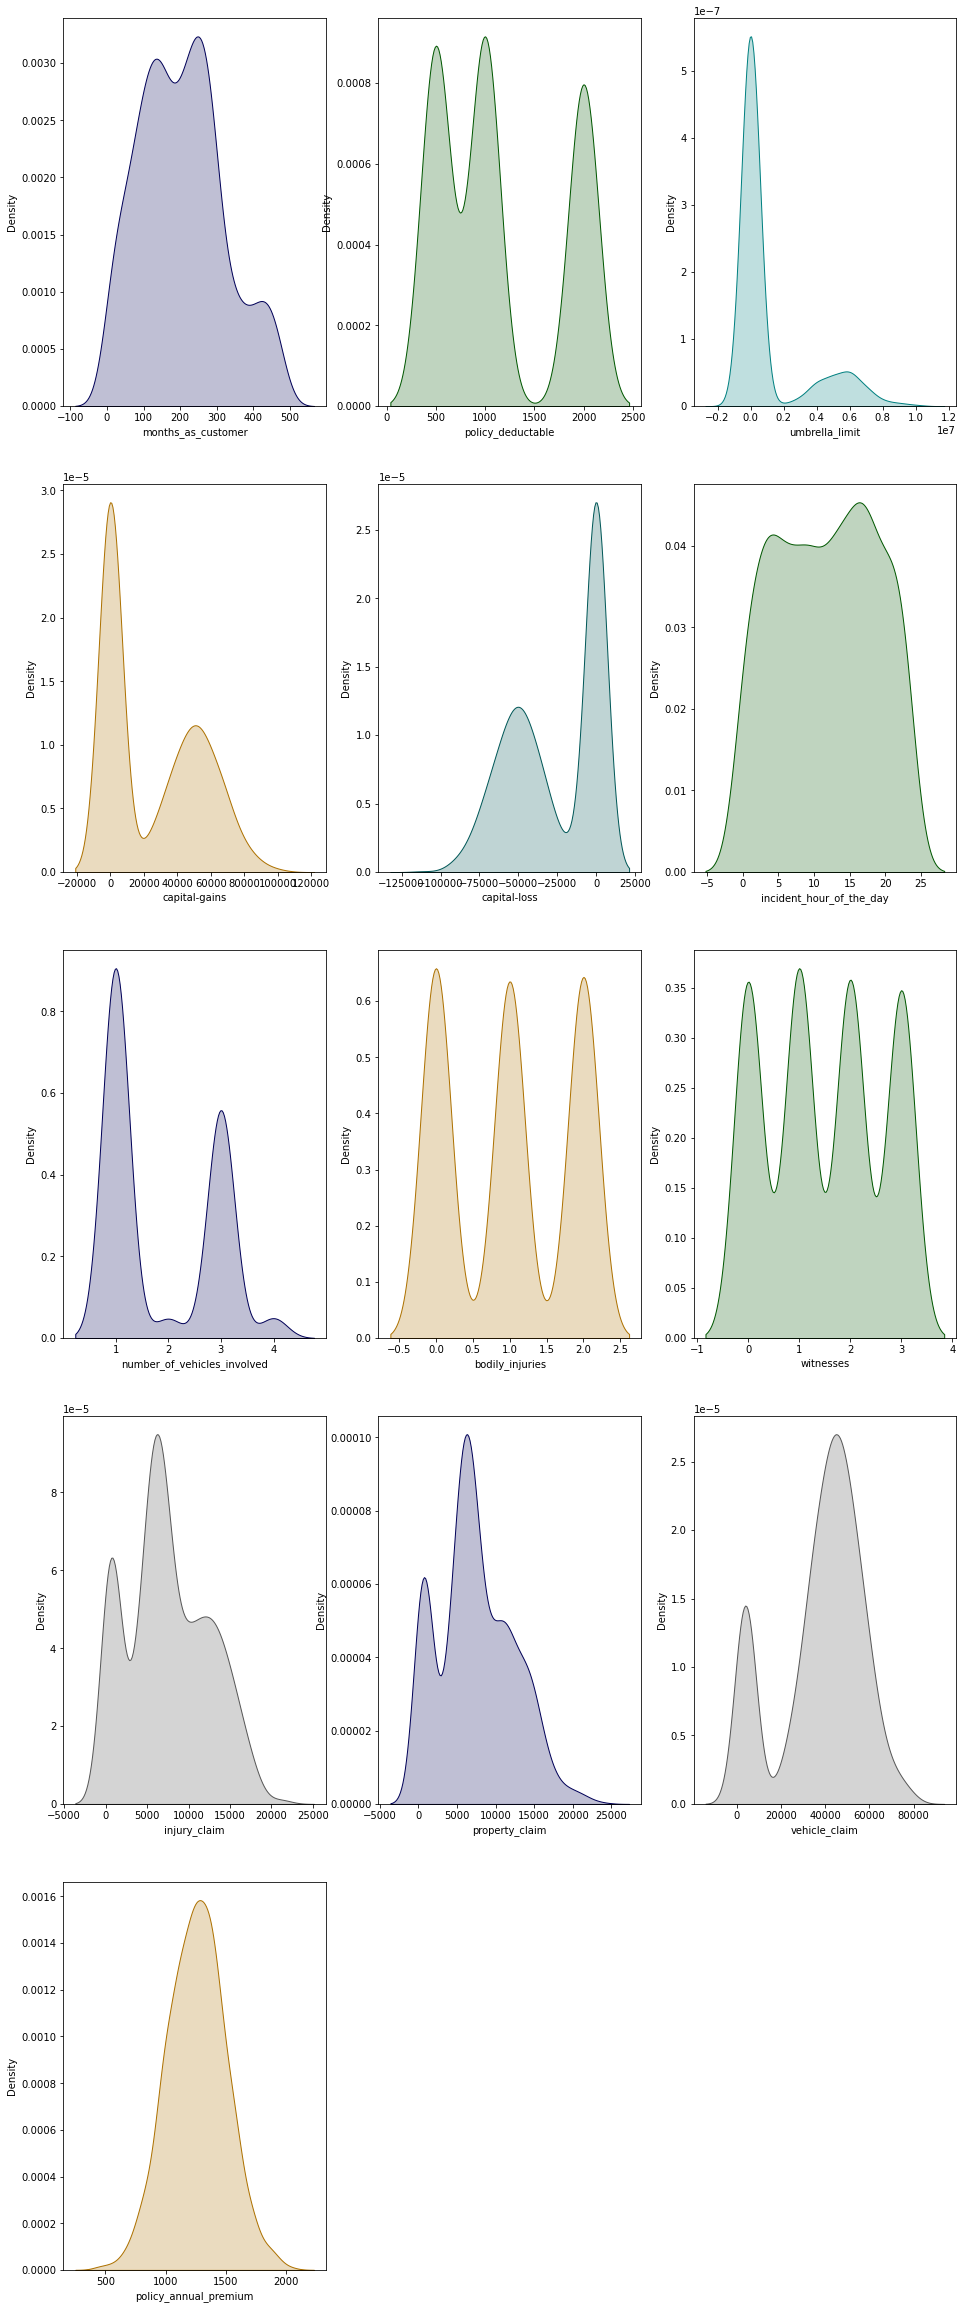

In [90]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

# Missing Values

In [91]:
df.isnull().sum()

months_as_customer               0
policy_deductable                0
umbrella_limit                   0
capital-gains                    0
capital-loss                     0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
bodily_injuries                  0
witnesses                        0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
policy_annual_premium            0
insured_education_level          0
insured_sex                      0
insured_occupation               0
insured_relationship             0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
property_damage                360
police_report_available        343
fraud_reported                   0
dtype: int64

# % of missing values

In [92]:
df.isnull().sum()/df.shape[0]*100

months_as_customer              0.0
policy_deductable               0.0
umbrella_limit                  0.0
capital-gains                   0.0
capital-loss                    0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
bodily_injuries                 0.0
witnesses                       0.0
injury_claim                    0.0
property_claim                  0.0
vehicle_claim                   0.0
policy_annual_premium           0.0
insured_education_level         0.0
insured_sex                     0.0
insured_occupation              0.0
insured_relationship            0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
property_damage                36.0
police_report_available        34.3
fraud_reported                  0.0
dtype: float64

In [93]:
df[['incident_type','collision_type']]

,incident_type,collision_type
0,Single Vehicle Collision,Side Collision
1,Vehicle Theft,NaN
2,Multi-vehicle Collision,Rear Collision
3,Single Vehicle Collision,Front Collision
4,Vehicle Theft,NaN
...,...,...
995,Single Vehicle Collision,Front Collision
996,Single Vehicle Collision,Rear Collision
997,Multi-vehicle Collision,Side Collision
998,Single Vehicle Collision,Rear Collision


In [94]:
df[df['collision_type'].isnull()][['incident_type','collision_type']]

,incident_type,collision_type
1,Vehicle Theft,NaN
4,Vehicle Theft,NaN
13,Parked Car,NaN
26,Parked Car,NaN
27,Vehicle Theft,NaN
...,...,...
964,Vehicle Theft,NaN
969,Vehicle Theft,NaN
983,Parked Car,NaN
994,Parked Car,NaN


In [95]:
df[df['collision_type'].isnull()]['incident_type'].unique()

array(['Vehicle Theft', 'Parked Car'], dtype=object)

In [96]:
df[df['incident_type']=='Parked Car']

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
13,121,1000,0,52800,-32800,5,1,1,1,1120,1120,5040,936.61,MD,FEMALE,armed-forces,wife,Parked Car,NaN,Minor Damage,None,NO,NO,N
26,257,2000,0,0,-29200,4,1,1,3,1640,820,6560,1322.10,High School,MALE,prof-specialty,own-child,Parked Car,NaN,Minor Damage,Police,YES,YES,N
37,289,2000,0,0,0,16,1,1,1,1230,820,3280,1222.48,JD,FEMALE,priv-house-serv,unmarried,Parked Car,NaN,Minor Damage,None,NO,YES,N
54,195,1000,0,47600,-39600,5,1,0,1,480,480,1680,1393.57,PhD,MALE,machine-op-inspct,not-in-family,Parked Car,NaN,Minor Damage,Police,NO,YES,N
57,94,1000,0,0,0,19,1,1,3,300,300,1800,1414.74,Masters,FEMALE,adm-clerical,own-child,Parked Car,NaN,Minor Damage,None,NO,NO,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,108,2000,6000000,52800,-54300,5,1,1,3,780,780,2730,1112.04,PhD,FEMALE,other-service,own-child,Parked Car,NaN,Minor Damage,None,NO,NO,N
950,101,500,6000000,30800,-43700,9,1,1,0,940,470,3760,982.70,College,FEMALE,transport-moving,unmarried,Parked Car,NaN,Minor Damage,None,NO,NO,N
983,17,1000,0,32500,-80800,9,1,2,1,430,430,2580,840.95,JD,FEMALE,adm-clerical,unmarried,Parked Car,NaN,Trivial Damage,Police,NaN,NaN,N
994,141,1000,0,0,-82100,6,1,1,2,540,1080,4860,1347.04,High School,MALE,sales,own-child,Parked Car,NaN,Minor Damage,None,NaN,YES,N


In [97]:
df[df['incident_type']=='Vehicle Theft']

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22,MD,MALE,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN,Y
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1583.91,Associate,MALE,sales,unmarried,Vehicle Theft,NaN,Minor Damage,None,NO,NO,N
27,202,500,3000000,31000,-30200,5,1,2,1,1040,520,4160,848.07,JD,MALE,exec-managerial,not-in-family,Vehicle Theft,NaN,Minor Damage,None,YES,NaN,Y
48,175,1000,8000000,0,0,5,1,2,0,810,810,5670,1123.87,PhD,FEMALE,protective-serv,other-relative,Vehicle Theft,NaN,Trivial Damage,Police,NaN,YES,N
51,91,2000,0,0,0,4,1,1,2,1320,660,5280,1073.83,JD,FEMALE,farming-fishing,husband,Vehicle Theft,NaN,Trivial Damage,None,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,137,500,0,0,-45300,21,1,0,0,600,600,2100,1107.07,High School,FEMALE,protective-serv,husband,Vehicle Theft,NaN,Minor Damage,Police,NO,YES,N
961,128,1000,0,0,-48800,16,1,2,0,1380,690,5520,1074.99,Associate,FEMALE,adm-clerical,husband,Vehicle Theft,NaN,Trivial Damage,Police,NaN,NaN,N
963,104,500,0,0,-70100,8,1,0,0,960,480,3360,1052.85,MD,FEMALE,protective-serv,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NO,YES,N
964,163,1000,4000000,0,-36400,7,1,2,1,390,780,2730,1200.33,High School,FEMALE,craft-repair,own-child,Vehicle Theft,NaN,Minor Damage,Police,NaN,YES,Y


In [98]:
df[df['property_damage'].isnull()]

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22,MD,MALE,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN,Y
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1415.74,PhD,FEMALE,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NaN,NO,Y
6,137,1000,0,0,-77000,0,3,0,0,21450,7150,50050,1333.35,PhD,MALE,prof-specialty,husband,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NaN,NaN,N
7,165,1000,0,0,0,23,3,2,2,9380,9380,32830,1137.03,Associate,MALE,tech-support,unmarried,Multi-vehicle Collision,Front Collision,Total Loss,Police,NaN,YES,N
16,70,1000,5000000,63600,0,0,3,1,2,5790,5790,40530,1199.44,College,MALE,machine-op-inspct,own-child,Multi-vehicle Collision,Rear Collision,Major Damage,Other,NaN,YES,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,1000,0,0,-32100,20,3,0,1,6020,6020,48160,1235.14,MD,MALE,exec-managerial,husband,Multi-vehicle Collision,Side Collision,Total Loss,Other,NaN,NaN,N
994,141,1000,0,0,-82100,6,1,1,2,540,1080,4860,1347.04,High School,MALE,sales,own-child,Parked Car,NaN,Minor Damage,None,NaN,YES,N
997,130,500,3000000,35100,0,4,3,2,3,7500,7500,52500,1383.49,Masters,FEMALE,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NaN,YES,N
998,458,2000,5000000,0,0,2,1,0,1,5220,5220,36540,1356.92,Associate,MALE,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NaN,YES,N


In [99]:
df['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [100]:
# Will replace with Mode

In [101]:
df[df['police_report_available'].isnull()]

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22,MD,MALE,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN,Y
6,137,1000,0,0,-77000,0,3,0,0,21450,7150,50050,1333.35,PhD,MALE,prof-specialty,husband,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NaN,NaN,N
9,212,500,0,0,-39300,14,1,2,1,4700,4700,32900,1315.68,PhD,MALE,priv-house-serv,wife,Single Vehicle Collision,Rear Collision,Total Loss,Other,NO,NaN,N
10,235,500,4000000,38400,0,22,1,2,2,7910,15820,63280,1253.12,Masters,FEMALE,exec-managerial,other-relative,Single Vehicle Collision,Front Collision,Total Loss,Police,YES,NaN,N
20,460,1000,4000000,0,0,20,3,1,0,0,5240,41920,1187.96,JD,MALE,other-service,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,1000,0,37500,-54000,3,3,1,2,5920,0,47360,1248.05,High School,FEMALE,exec-managerial,husband,Multi-vehicle Collision,Rear Collision,Total Loss,Police,YES,NaN,N
993,124,1000,0,0,-32100,20,3,0,1,6020,6020,48160,1235.14,MD,MALE,exec-managerial,husband,Multi-vehicle Collision,Side Collision,Total Loss,Other,NaN,NaN,N
995,3,1000,0,0,0,20,1,0,1,17440,8720,61040,1310.80,Masters,FEMALE,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,NaN,N
996,285,1000,0,70900,0,23,1,2,3,18080,18080,72320,1436.79,PhD,FEMALE,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,NaN,N


In [102]:
Missing_coulmn=[]
for i in df.columns:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [103]:
df.isnull().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
policy_annual_premium          0
insured_education_level        0
insured_sex                    0
insured_occupation             0
insured_relationship           0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
property_damage                0
police_report_available        0
fraud_reported                 0
dtype: int64

# Correlation

In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Target']=le.fit_transform(df['fraud_reported'])

<AxesSubplot:>

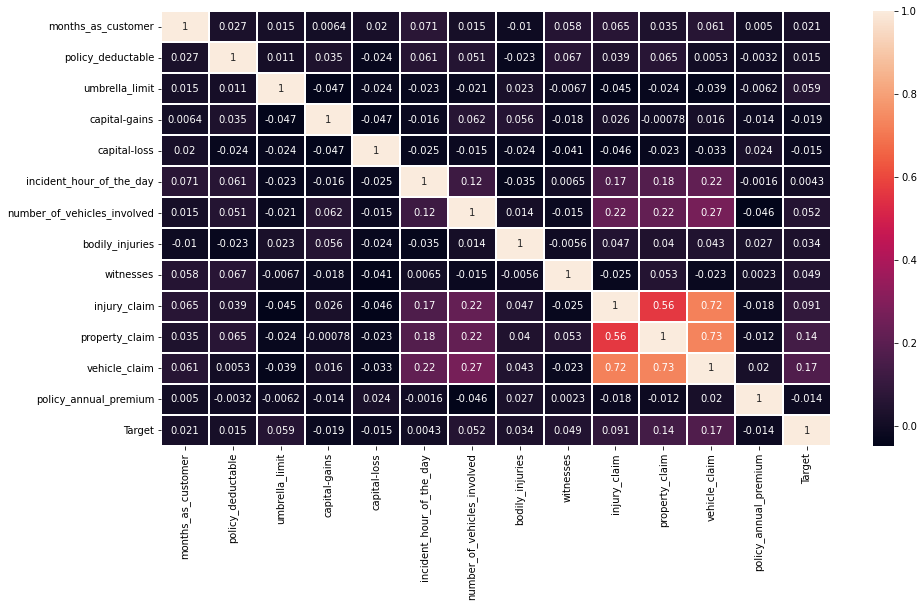

In [105]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

In [106]:
df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported,Target
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1406.91,MD,MALE,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y,1
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22,MD,MALE,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,1413.14,PhD,FEMALE,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1415.74,PhD,FEMALE,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1583.91,Associate,MALE,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N,0


In [107]:
['policy_number','policy_bind_date','insured_zip','incident_date', 'incident_location']

['policy_number',
 'policy_bind_date',
 'insured_zip',
 'incident_date',
 'incident_location']

In [108]:
df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported,Target
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1406.91,MD,MALE,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y,1
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1197.22,MD,MALE,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,1413.14,PhD,FEMALE,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1415.74,PhD,FEMALE,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,1583.91,Associate,MALE,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N,0


In [109]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [110]:
['policy_number','policy_bind_date','insured_zip','incident_date', 'incident_location','policy_csl']

['policy_number',
 'policy_bind_date',
 'insured_zip',
 'incident_date',
 'incident_location',
 'policy_csl']

In [111]:
# Target Variable:

df[['fraud_reported','Target']]
    

,fraud_reported,Target
0,Y,1
1,Y,1
2,N,0
3,Y,1
4,N,0
...,...,...
995,N,0
996,N,0
997,N,0
998,N,0


In [112]:
df['incident_hour_of_the_day']

0       5
1       8
2       7
3       5
4      20
       ..
995    20
996    23
997     4
998     2
999     6
Name: incident_hour_of_the_day, Length: 1000, dtype: int64

In [113]:
# This should be trated like categorical column

df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [114]:
df=df.drop('fraud_reported', axis=1)

In [115]:
df.shape

(1000, 24)

In [116]:
df.head(1)

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_annual_premium,insured_education_level,insured_sex,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,Target
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1406.91,MD,MALE,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,1


<AxesSubplot:>

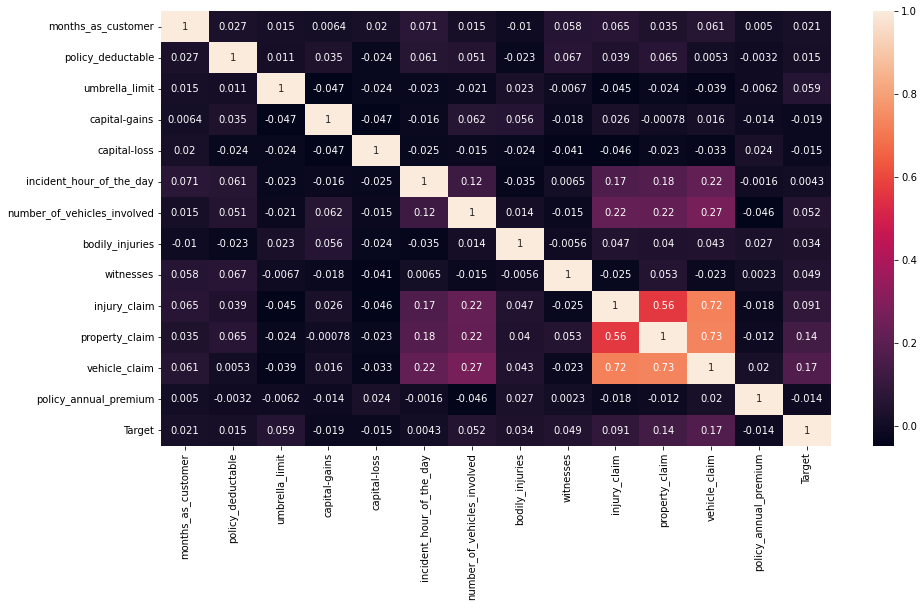

In [117]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

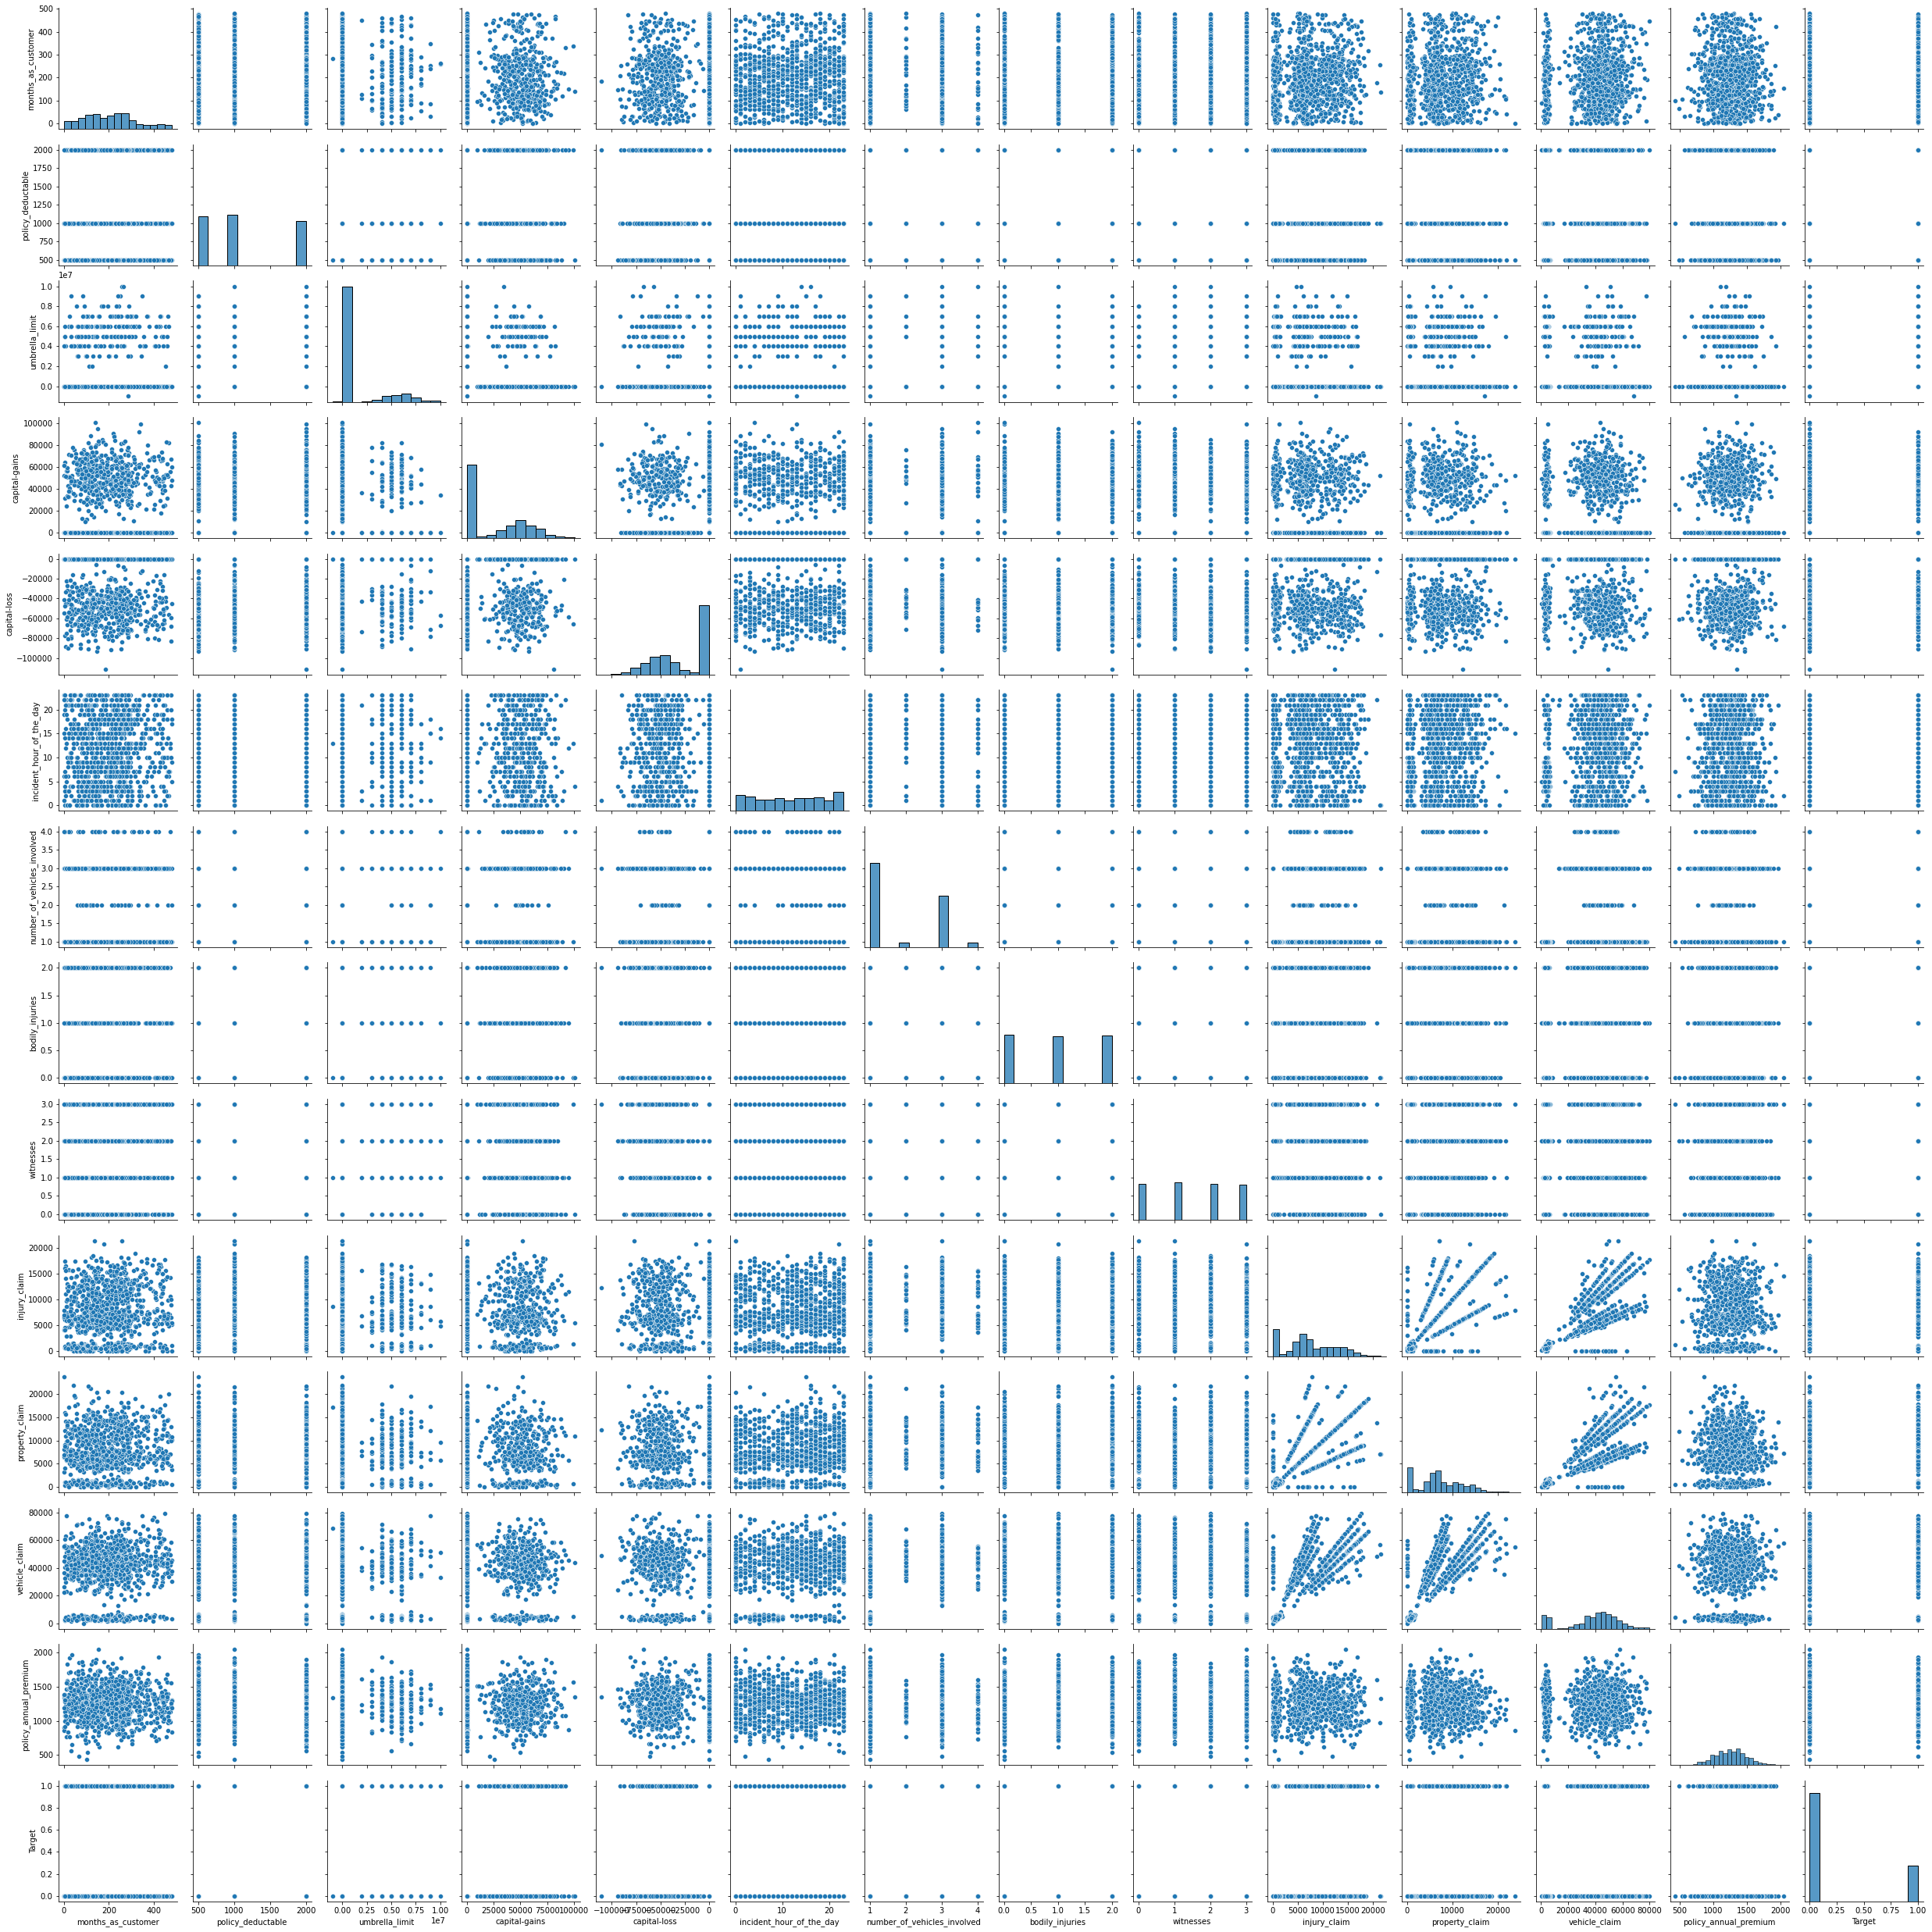

In [118]:
sns.pairplot(df)

# Seprate Independent and Independent Variables

In [119]:
X=df.drop('Target',axis=1)
Y=df['Target']

In [120]:
X.shape ,Y.shape

((1000, 23), (1000,))

In [121]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

In [122]:
catg_features

['insured_education_level',
 'insured_sex',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available']

In [123]:
cont_features

['months_as_customer',
 'policy_deductable',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'policy_annual_premium']

In [124]:
len(catg_features) + len(cont_features)

23

# Continuous Fetaures

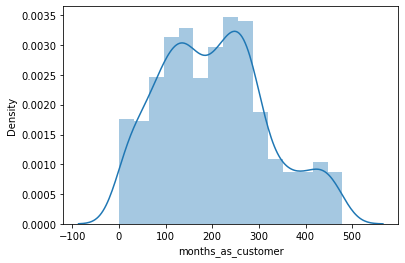

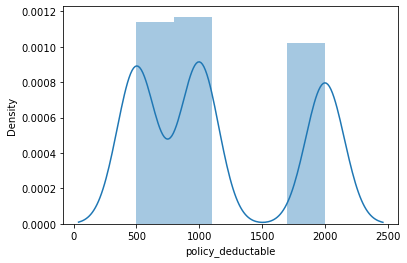

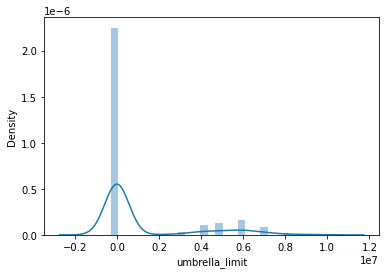

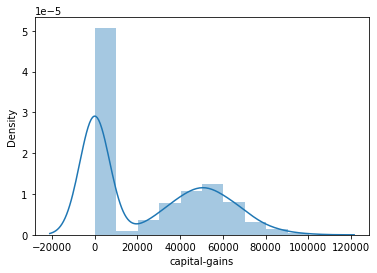

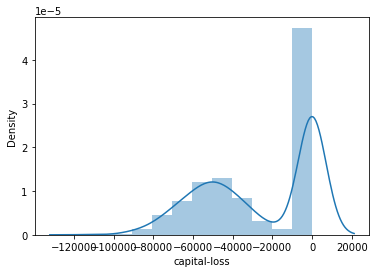

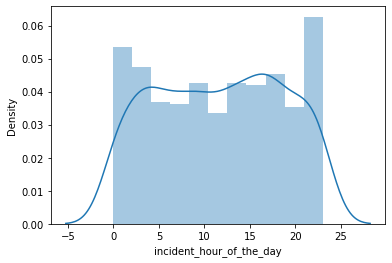

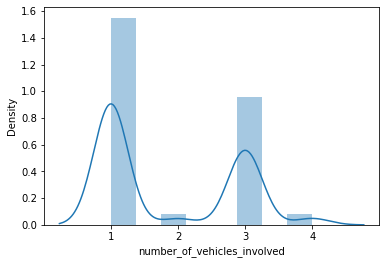

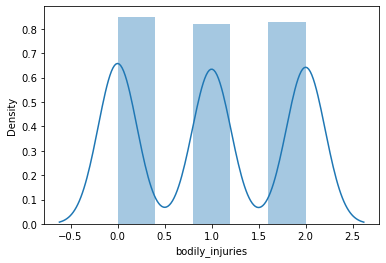

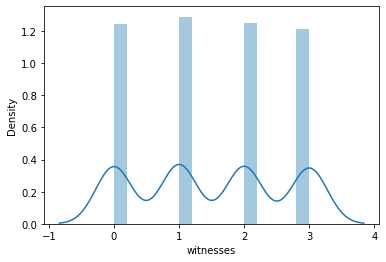

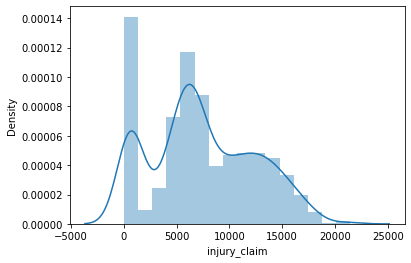

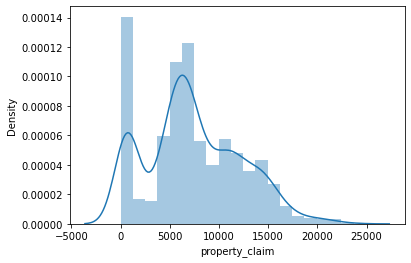

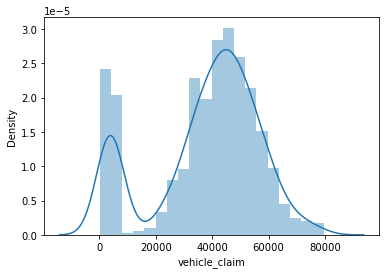

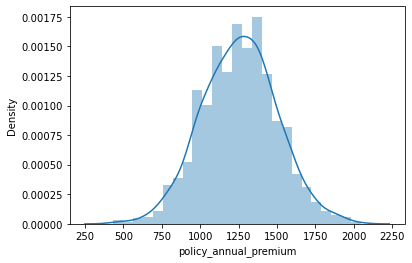

In [125]:
for i in cont_features:
    sns.distplot(X[i])
    plt.show()

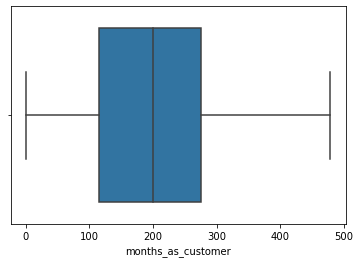

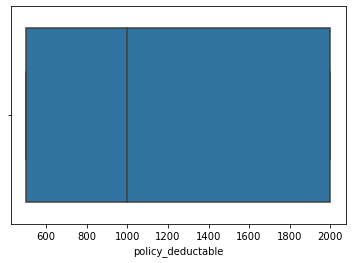

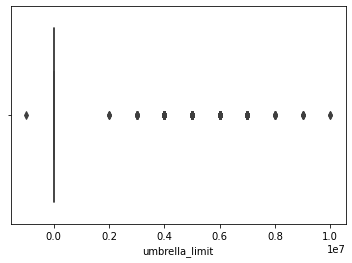

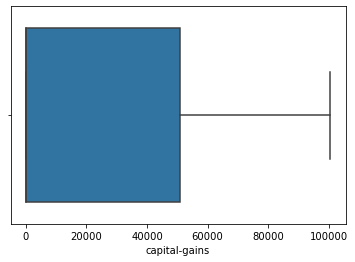

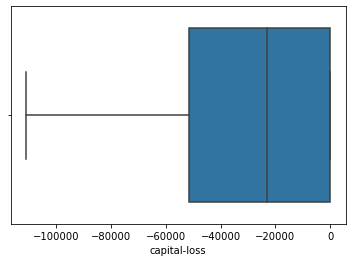

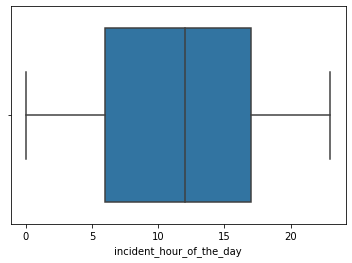

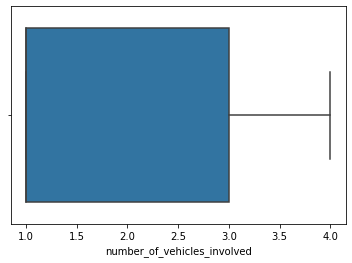

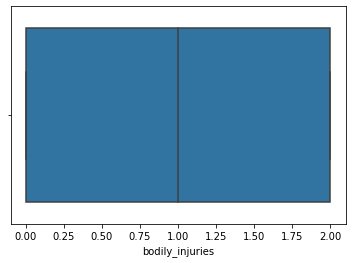

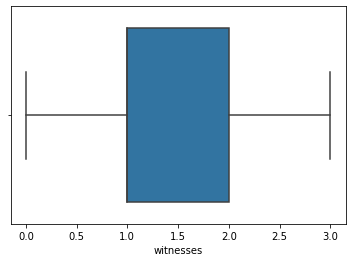

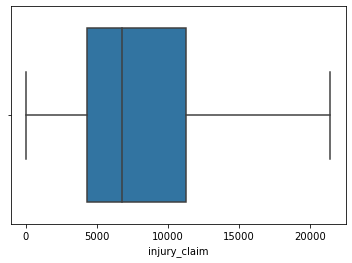

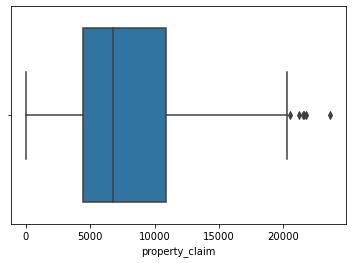

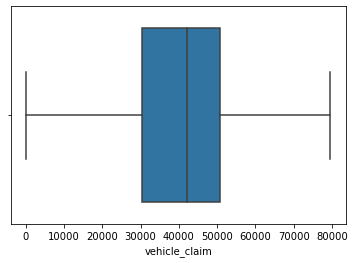

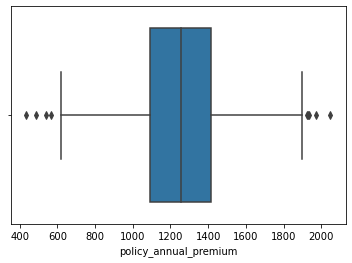

In [126]:
for i in cont_features:
    sns.boxplot(X[i])
    plt.show()

In [127]:
X[cont_features].skew()

months_as_customer             0.362177
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_annual_premium          0.004402
dtype: float64

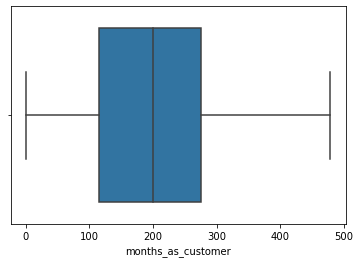

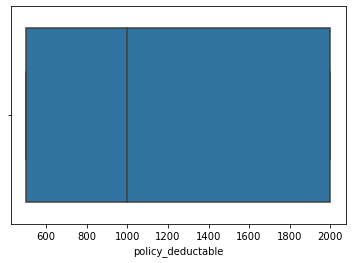

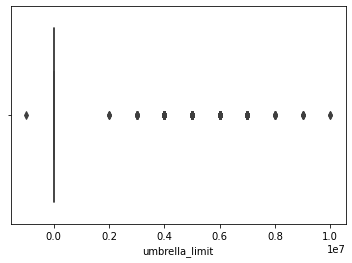

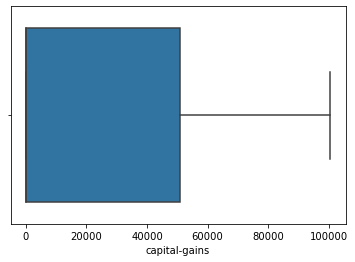

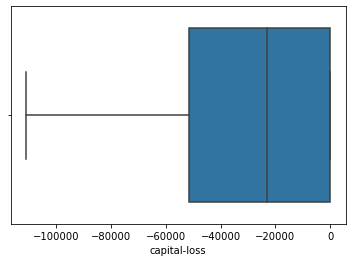

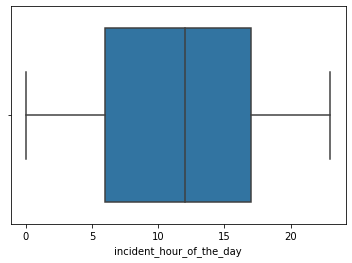

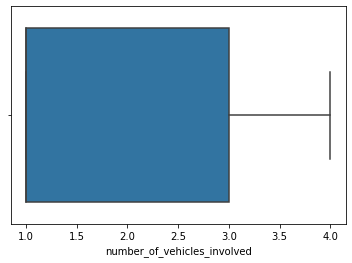

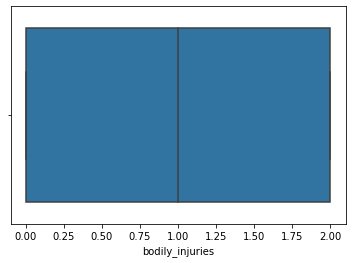

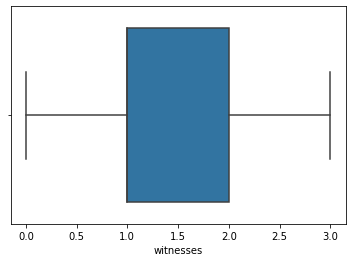

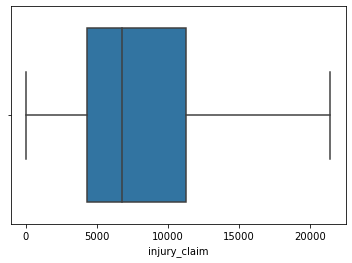

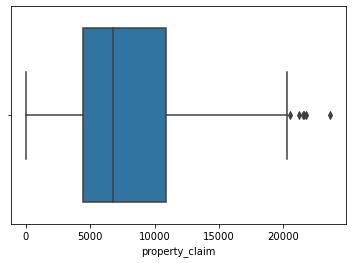

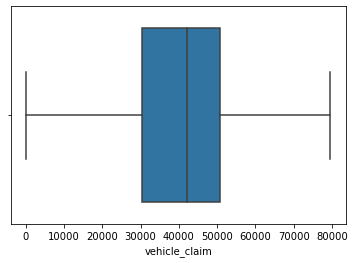

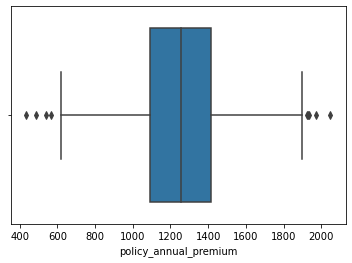

In [128]:
for i in cont_features:
    sns.boxplot(X[i])
    plt.show()

# Remaining catrgorical are Nominal, Lets encode them

In [129]:
X=pd.get_dummies(X,drop_first=True)

In [130]:
X.shape  , Y.shape

((1000, 52), (1000,))

# Balancing Data:  SMOTE / Over Sampling

In [131]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [132]:
x.shape , y.shape

((1506, 52), (1506,))

In [133]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: Target, dtype: object

In [134]:
x.to_csv("encoded-dataset.csv")

# Macine Learning

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [136]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    

Best accuracy is  0.6305309734513275 on Random State = 172


In [137]:
# Use, Random state= 8

In [138]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=8,test_size=.3)

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
LR_model= LogisticRegression()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()


model=[LR_model,DT_model,SV_model,KNR_model,XGB_model,SGH_model,Bag_model ]

In [159]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred), 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)

Confusion Matrix of  LogisticRegression()  is 
 [[131 118]
 [ 65 138]]
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[204  45]
 [ 38 165]]
Confusion Matrix of  SVC()  is 
 [[  0 249]
 [  0 203]]
Confusion Matrix of  KNeighborsClassifier()  is 
 [[145 104]
 [ 36 167]]
Confusion Matrix of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)  is 


In [160]:
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

,Model,Accuracy,F1 Score
0,LogisticRegression(),59.51,0.60
1,DecisionTreeClassifier(),81.64,0.80
2,SVC(),44.91,0.62
3,KNeighborsClassifier(),69.03,0.70
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",87.61,0.86
5,SGDClassifier(),54.65,0.62
6,(DecisionTreeClassifier(random_state=135439159...,87.17,0.85


# Cross Validation

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
acc=[]
cross=[]
diff=[]
for i in model:
    acc.append(accuracy_score(y_test,i.predict(x_test))*100)
    cross.append(cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    diff.append((accuracy_score(y_test,i.predict(x_test))*100)- (cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100))
    
pd.DataFrame({'Model':model,'Accuracy':acc,'Cross Validation':cross,'Difference':diff})

,Model,Accuracy,Cross Validation,Difference
0,LogisticRegression(),59.513274,56.906119,2.607156
1,DecisionTreeClassifier(),81.637168,80.622429,0.882289
2,SVC(),44.911504,52.257376,-7.345872
3,KNeighborsClassifier(),69.026549,70.120129,-1.093581
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",87.610619,83.942708,3.667912
5,SGDClassifier(),54.646018,52.916988,1.391964
6,(DecisionTreeClassifier(random_state=135439159...,87.168142,84.604959,3.424990


In [164]:
accuracy=[]
f1=[]
cross=[]

for m in model:
    m.fit(x_train,y_train)
    
    pred= m.predict(x_test)
  
    f1.append(round(f1_score(y_test,pred), 2))
    cross.append(cross_val_score(i,x,y,cv=5, scoring='f1').mean()*100)
    
pd.DataFrame({'Model':model,'F1':f1,'Cross Validation':cross})

,Model,F1,Cross Validation
0,LogisticRegression(),0.60,82.315735
1,DecisionTreeClassifier(),0.80,81.157241
2,SVC(),0.62,79.538007
3,KNeighborsClassifier(),0.70,82.103310
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.86,82.104505
5,SGDClassifier(),0.46,82.816620
6,(DecisionTreeClassifier(random_state=498771478...,0.85,82.010894


In [165]:
#Based on accuracy score and difference with cross validation we have selected ExtremeGradientBoostingClassifier()



## Extreme Gradient BoostingClassifier()  Hypertuning

In [166]:
# Lets try to hypertune this algo.


In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }

In [169]:
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...elta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                    

In [1]:
GCV.best_estimator_

NameError: name 'GCV' is not defined

In [152]:
GCV.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}

In [153]:
pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,pred)

0.8672566371681416

# Confusion Matrix

<AxesSubplot:>

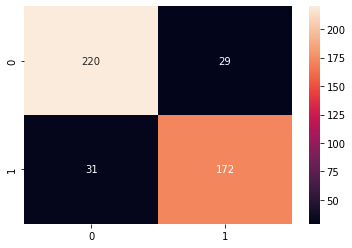

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

# AUC ROC plot

In [155]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

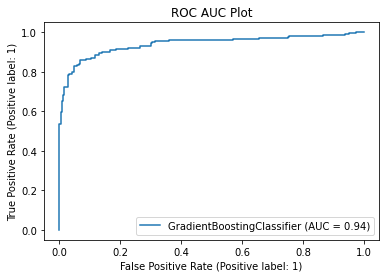

In [156]:
plot_roc_curve(XGB_model,x_test,y_test)
plt.title('ROC AUC Plot')

# Saving the Model

In [157]:
import pickle
pickle.dump(GCV,open("final-output.pkl","wb"))